**Name:**   Abdulla-Al-Noman

**Intern:** Data_Science

**Task4:**  SALES PREDICTION USING PYTHON

***Import Library***

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

***Data Read***

In [2]:
sales = pd.read_csv(r'C:\Users\USER\Desktop\intern\sales\advertising.csv')

In [3]:
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
sales.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
sales.shape

(200, 4)

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
sales.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

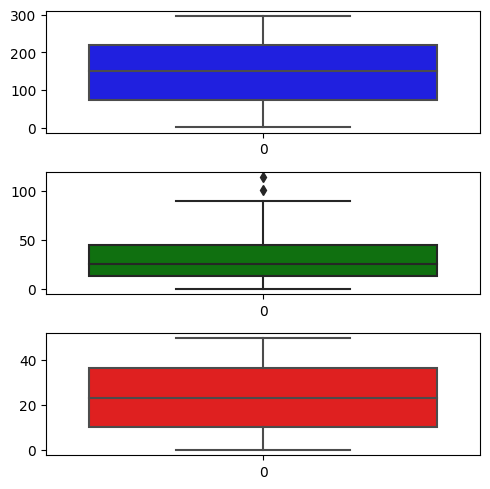

In [9]:
# Visualizing outliers (use boxplots)
fig, axs = plt.subplots(3, figsize=(5, 5))
plt1 = sns.boxplot(sales['TV'], ax=axs[0], color='blue')
plt2 = sns.boxplot(sales['Newspaper'], ax=axs[1], color='green')
plt3 = sns.boxplot(sales['Radio'], ax=axs[2], color='red')
plt.tight_layout()

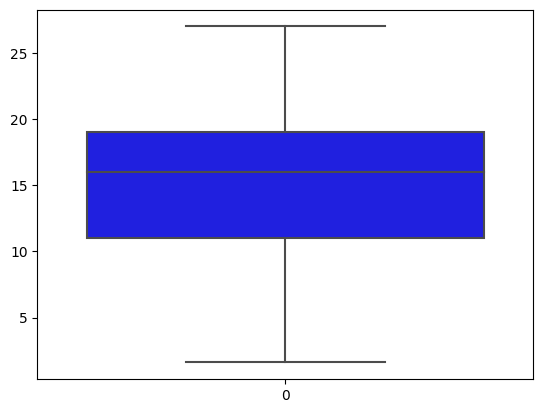

In [10]:
# Visualize distribution target variable
sns.boxplot(sales['Sales'], color='blue')
plt.show()

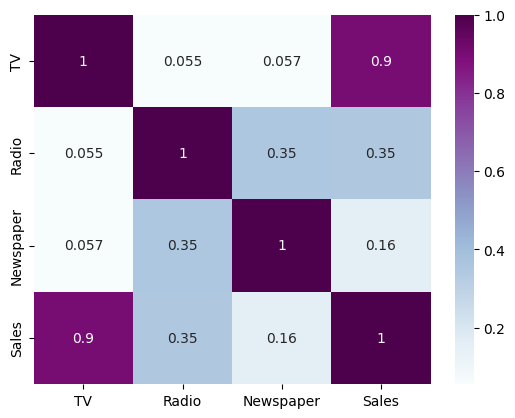

In [11]:
corr = sales.corr()
sns.heatmap(corr, annot= True, cmap = 'BuPu')
plt.show()

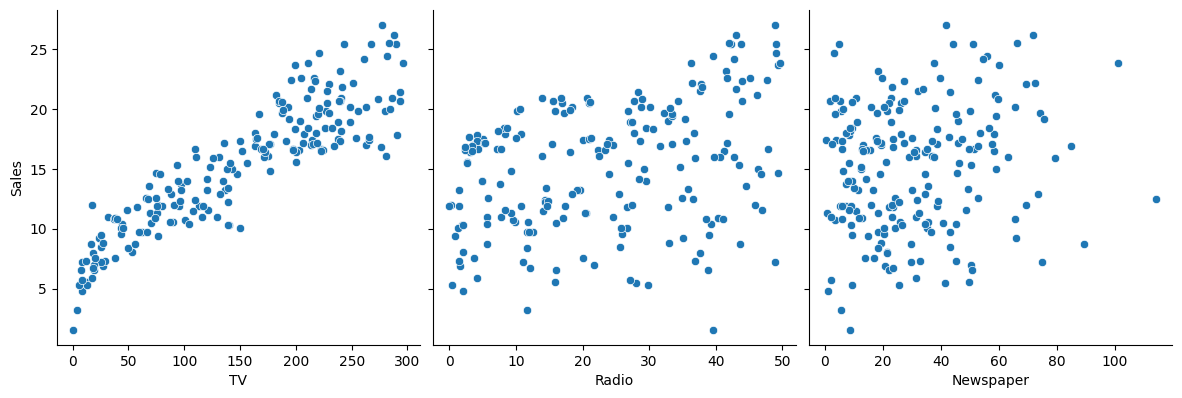

In [12]:
sns.pairplot(sales, x_vars = ['TV','Radio','Newspaper'], y_vars=['Sales'], kind = 'scatter', aspect = 1, height = 4)

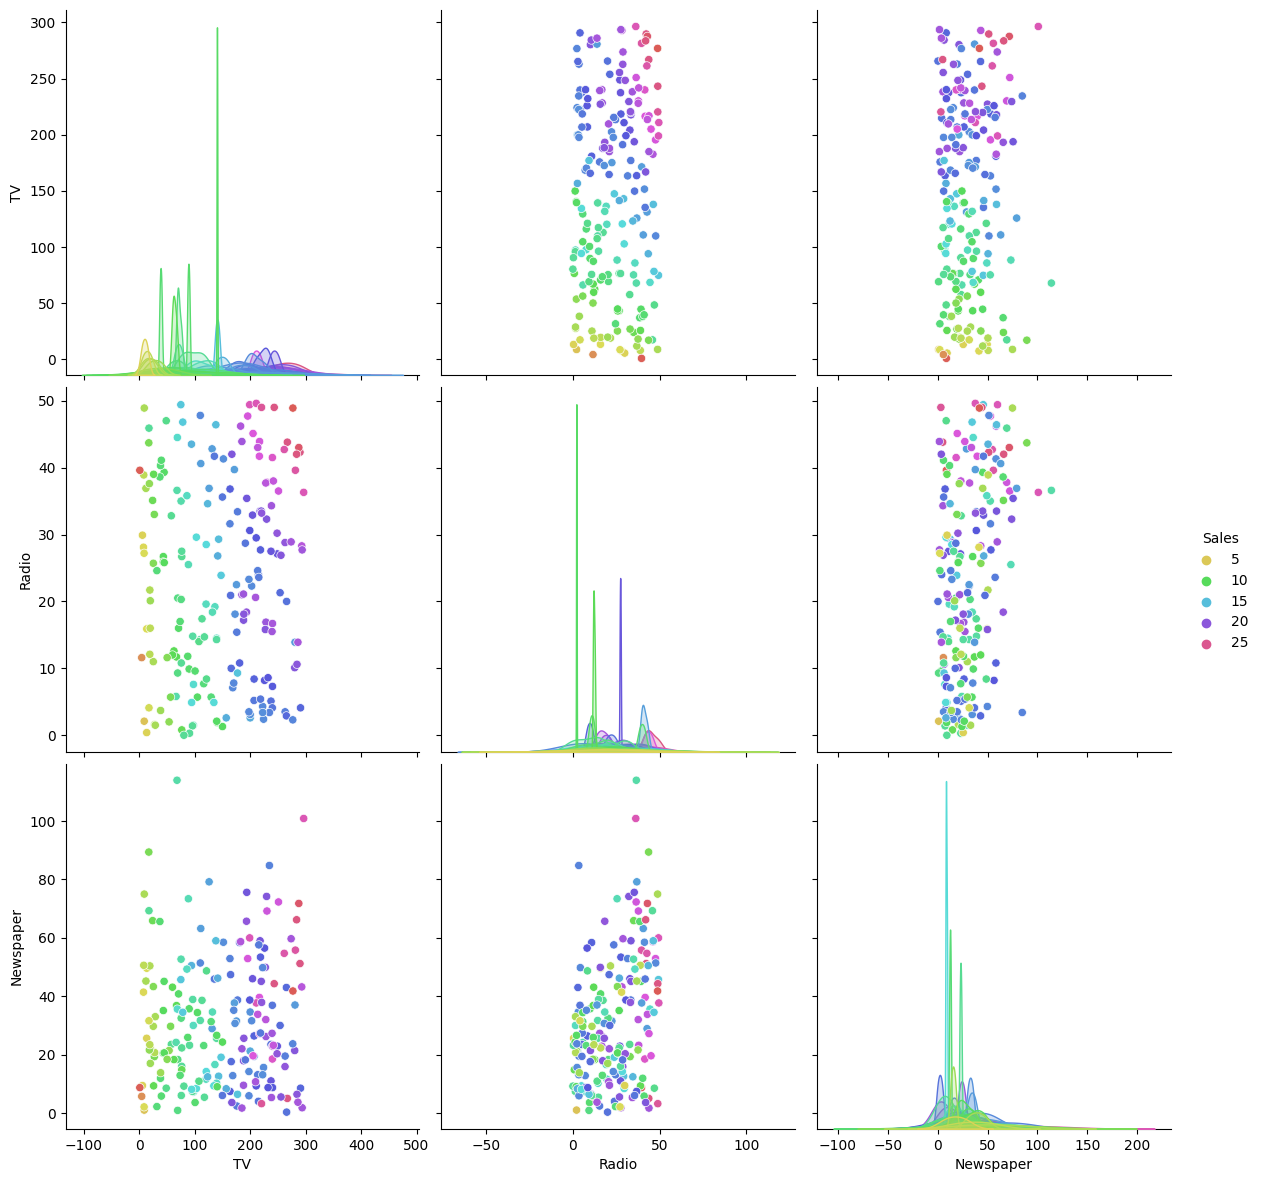

In [13]:
sns.pairplot(sales, kind = 'scatter', aspect = 1, height = 4, palette = 'hls', hue='Sales')

***Test and Train***

In [14]:
x = sales['TV']
y = sales['Sales']
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=120)


In [15]:
# Build linear regression model(statsmodels)
X_train_sm = sm.add_constant(X_train)
linear_model = sm.OLS(y_train, X_train_sm).fit()

In [16]:
# Displaying the model summary
linear_model_summary = linear_model.summary()
print(linear_model_summary)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     606.9
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           2.24e-52
Time:                        20:27:58   Log-Likelihood:                -317.66
No. Observations:                 140   AIC:                             639.3
Df Residuals:                     138   BIC:                             645.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5733      0.396     16.582      0.0

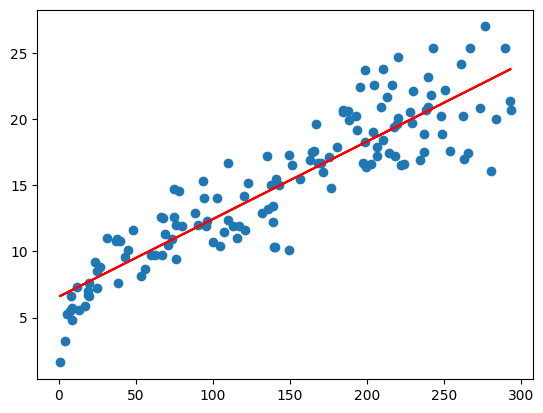

In [17]:
# Plotting the regression line on the training data
plt.scatter(X_train, y_train)
plt.plot(X_train, linear_model.params[0]+linear_model.params[1]*X_train, 'r')
plt.show()

<Figure size 640x480 with 0 Axes>

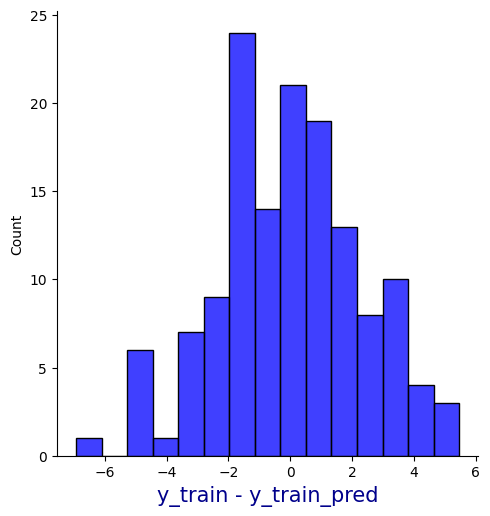

In [18]:
# Checking the distribution of error terms
y_train_pred = linear_model.predict(X_train_sm)
residuals = (y_train - y_train_pred)

fig = plt.figure()
error_terms_distribution = sns.displot(residuals, bins=15, color='blue')
fig.suptitle('Error Terms Distribution', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15, color='darkblue')
plt.show()

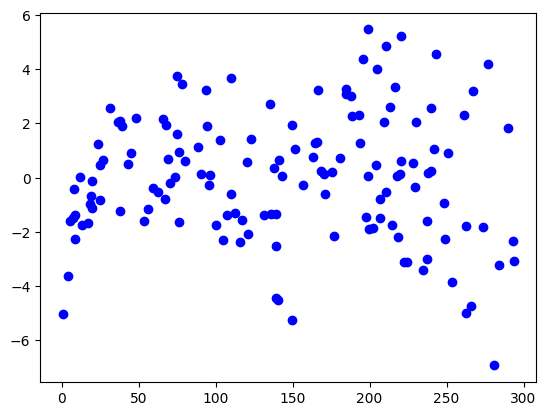

In [19]:
# Scatter plot of predicted vs. actual values on the training data
plt.scatter(X_train, residuals, color='blue')
plt.show()

In [20]:
# Evaluating the model on the test data
X_test_sm = sm.add_constant(X_test)
y_pred = linear_model.predict(X_test_sm)

In [21]:
# Evaluating the model on the test data
X_test_sm = sm.add_constant(X_test)
y_pred = linear_model.predict(X_test_sm)

In [22]:
# Assuming y_test and y_pred are already defined
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('R Squared value = ',r_squared)

R Squared value =  0.7929926978839348


In [27]:
# Displaying the results
r2_results = f"Root Mean Squared Error:{np.sqrt(mse)}\nR-squared: {r_squared}"
print(r2_results)

Root Mean Squared Error:2.207483005109358
R-squared: 0.7929926978839348


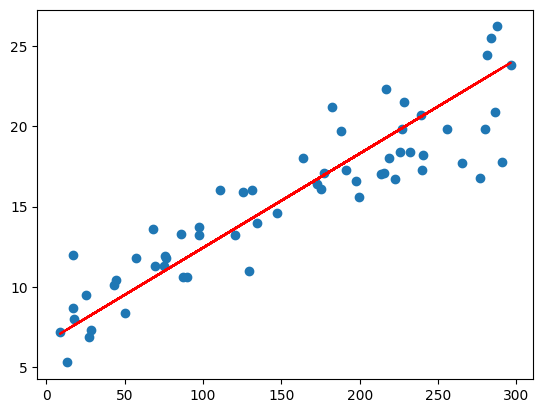

In [24]:
# Plotting the regression line on the test data
plt.scatter(X_test, y_test)
plt.plot(X_test, linear_model.params[0] + linear_model.params[1] * X_test, 'r')
plt.show()

***Predictions on the set***

In [25]:
x_test_sm = sm.add_constant(X_test)
# Predict the y values corresponding to x_test_sm
y_pred = linear_model.predict(x_test_sm)

In [26]:
y_pred.head()

87     13.061903
118    13.941114
80     11.051441
198    23.196275
62     20.599672
dtype: float64